# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# LIBRARIES IMPORT


In [1]:
#!pip install --upgrade seaborn
#!pip install --upgrade pandas


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [3]:
fueleconomy_df = pd.read_csv("FuelEconomy.csv")

In [4]:
fueleconomy_df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
fueleconomy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
fueleconomy_df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [7]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


# VISUALIZE DATASET

Create a joint plot using Seaborn to visualize the relationship. 
Display a scatter plot with histograms for each variable on the axes.

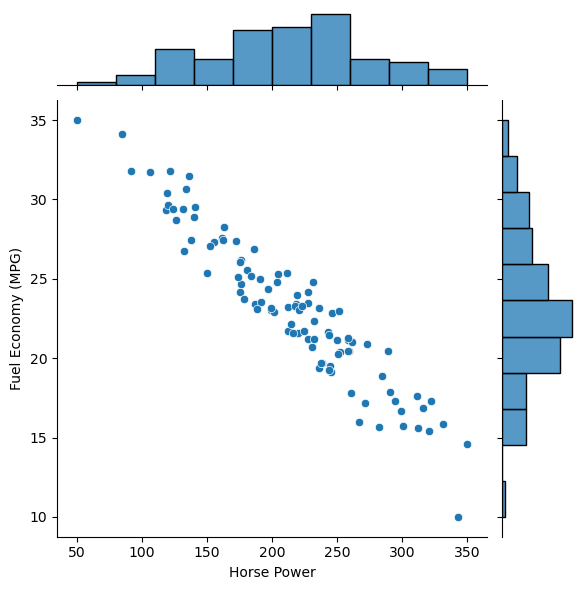

In [8]:
sns.jointplot(
    x = 'Horse Power', 
    y = 'Fuel Economy (MPG)', 
    data = fueleconomy_df)

Generate a pair plot using Seaborn to visualize pairwise relationships in the dataset.

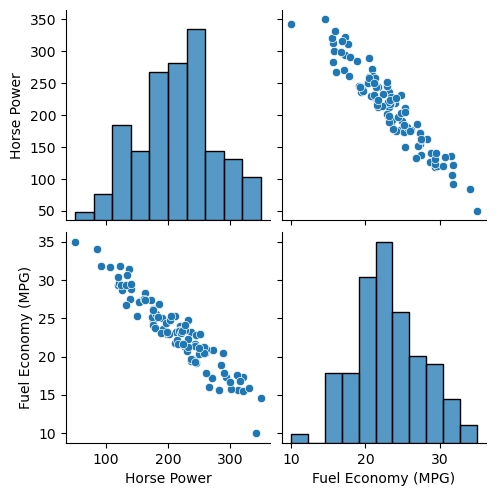

In [9]:
sns.pairplot(fueleconomy_df)

Create a linear model plot using Seaborn to display a scatter plot of the data points along with a fitted regression line.

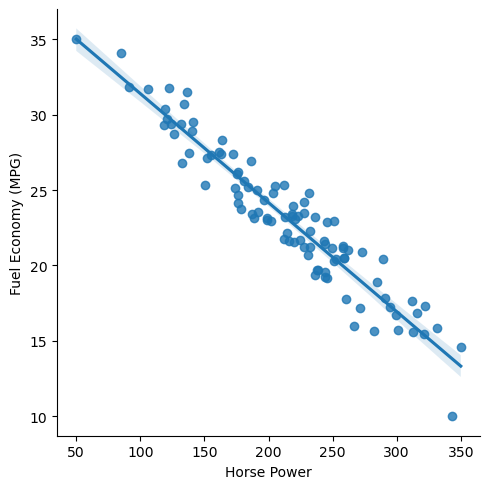

In [10]:
sns.lmplot(
    x = 'Horse Power', 
    y = 'Fuel Economy (MPG)', 
    data = fueleconomy_df)

# CREATE TESTING AND TRAINING DATASET

Preparing for machine learning model.

In [11]:
X = fueleconomy_df[['Horse Power']]

In [12]:
y = fueleconomy_df['Fuel Economy (MPG)']

In [13]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [14]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

Split the data into training and testing sets. Separate X (features) and y (target) with 25% of the data allocated for testing.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.25)

# TRAIN THE MODEL

In [17]:
X_train.shape

(75, 1)

In [18]:
X_test.shape

(25, 1)

Import class from Scikit-learn. Create an instance of it with the intercept enabled. Fits the linear regression model to the training data.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression(fit_intercept =True)

In [21]:
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-0.07147075]
Linear Model Coefficient (b):  38.47383434099624


# TEST THE MODEL 

Make predictions on the test set.

In [23]:
y_predict = regressor.predict( X_test)
y_predict

array([30.87952698, 23.01605429, 22.80298146, 29.4534389 , 23.26922152,
       23.31610043, 23.1444667 , 24.06343997, 22.69874272, 21.00936024,
       19.07369897, 22.52301736, 19.40046097, 28.43703156, 16.13978167,
       20.01234308, 28.39933149, 23.34139605, 24.77183278, 20.90486546,
       25.8964675 , 14.76708691, 23.81898593, 22.20205537, 29.07242061])

In [24]:
y_test

87    31.722566
82    21.595626
2     23.952010
8     28.718210
20    23.204745
63    21.726252
76    22.183092
58    22.937653
62    23.059180
47    19.536770
6     17.163583
70    23.307192
96    15.989945
23    28.882081
32    15.618956
74    21.261778
98    29.515593
14    25.341892
13    23.556729
52    22.849711
31    26.188478
86    15.837968
91    25.286954
44    21.205987
93    29.397567
Name: Fuel Economy (MPG), dtype: float64

Visualize the relationship in the training dataset.

Text(0.5, 1.0, 'HP vs. MPG (Training dataset)')

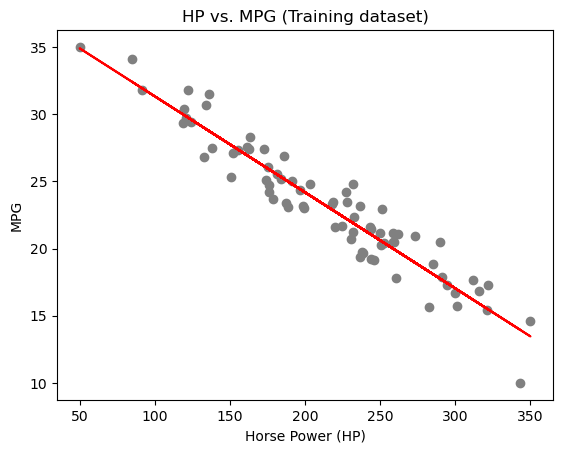

In [25]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')

Text(0.5, 1.0, 'HP vs. MPG (Testing dataset)')

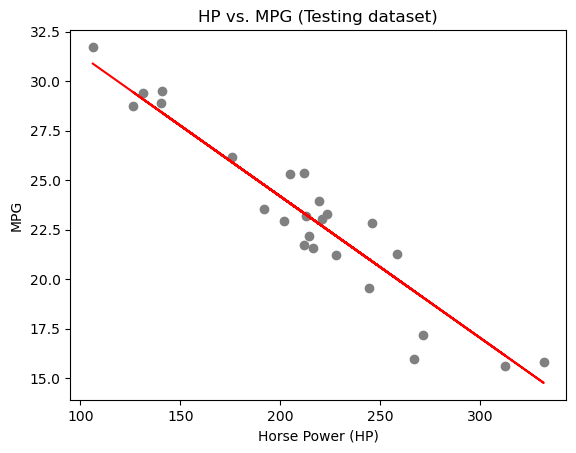

In [26]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')

In [27]:
HP = [[240]]
y_predict = regressor.predict(HP)
y_predict

array([21.32085427])